In [1]:
from __future__ import print_function, division, absolute_import, unicode_literals
import csv
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

#beginning of main program

#read in dataset1
csvf = open('ECB_Notice_of_Violations-2015.csv','rU')
rows = csv.reader(csvf)
ecb_sheet = [row for row in rows]
csvf.close()

#read in dataset2
csvf = open('ECB_Notice_of_Violations-2014.csv','rU')
rows = csv.reader(csvf)
ecb_sheet1 = [row for row in rows]
csvf.close()

In [2]:
#first row of each spreadsheet is column headings, so we remove them
ecb_sheet_data = ecb_sheet[1:]
ecb_sheet_data1 = ecb_sheet1[1:]

#give number of clusters
K=3 #three clusters

#find the sorted list of times
times = []
times1 = []
countys = []
countys1 = []
for row in ecb_sheet_data:
    countys.append(row[4])
    times.append(row[2])
countys = list(set(countys))
times = list(set(times))
times.sort()
countys.sort()
num_times = len(times)
num_countys = len(countys)

for row in ecb_sheet_data1:
    countys1.append(row[4])
    times1.append(row[2])
countys1 = list(set(countys1))
times1 = list(set(times1))
times1.sort()
countys1.sort()
num_times1 = len(times1)
num_countys1 = len(countys1)

In [3]:
#create a num_countys x num_times matrix of which county is recorded in what time
county_time_matrix = np.zeros((num_countys,num_times))
for row in ecb_sheet_data:
    time_number = times.index(row[2])
    county_number = countys.index(row[4])
    county_time_matrix[county_number,time_number] = 1
time_county_matrix = county_time_matrix.transpose()
#print (county_time_matrix)

county_time_matrix1 = np.zeros((num_countys1,num_times1))
for row in ecb_sheet_data1:
    time_number1 = times1.index(row[2])
    county_number1 = countys1.index(row[4])
    county_time_matrix1[county_number1,time_number1] = 1
time_county_matrix1 = county_time_matrix1.transpose()

In [4]:
#initialize and carry out clustering
km = KMeans(n_clusters = K)
km.fit(time_county_matrix)

km1 = KMeans(n_clusters = K)
km1.fit(time_county_matrix1)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [5]:
#find center of clusters
centers = km.cluster_centers_
centers[centers<0] = 0 #the minimization function may find very small negative numbers, we threshold them to 0
centers = centers.round(2)
print('\n--------Centers of the three different clusters for 2015 data--------')
print('Cent1\t Cent2\t Cent3')
for i in range(num_countys):
    print(centers[0,i],'\t',centers[1,i],'\t',centers[2,i])
    
#find clusters for 2014 data
centers1 = km1.cluster_centers_
centers1[centers1<0] = 0 #the minimization function may find very small negative numbers, we threshold them to 0
centers1 = centers1.round(2)
print('\n--------Centers of the three different clusters for 2014 data--------')
print('Cent1\t Cent2\t Cent3')
for i in range(num_countys1):
    print(centers1[0,i],'\t',centers1[1,i],'\t',centers1[2,i])


--------Centers of the three different clusters for 2015 data--------
Cent1	 Cent2	 Cent3
0.97 	 0.68 	 1.0
1.0 	 0.89 	 1.0
0.97 	 0.86 	 1.0
0.0 	 0.0 	 1.0
0.99 	 0.81 	 1.0
1.0 	 0.0 	 0.97

--------Centers of the three different clusters for 2014 data--------
Cent1	 Cent2	 Cent3
0.98 	 0.74 	 1.0
0.99 	 0.87 	 1.0
0.99 	 0.86 	 1.0
0.0 	 0.0 	 1.0
0.99 	 0.76 	 1.0
1.0 	 0.01 	 0.97


In [6]:
#find which cluster each time is in
prediction = km.predict(time_county_matrix)
print('\n--------Which cluster each time is in--------')
print('{:<15}\t{}'.format('Time','Cluster'))
for i in range(len(prediction)):
    print('{:<15}\t{}'.format(times[i],prediction[i]+1))
    

#find which cluster each time is in(2014)
prediction1 = km1.predict(time_county_matrix1)
print('\n--------Which cluster each time is in--------')
print('{:<15}\t{}'.format('Time','Cluster'))
for i in range(len(prediction1)):
    print('{:<15}\t{}'.format(times1[i],prediction1[i]+1))


--------Which cluster each time is in--------
Time           	Cluster
10:00 AM       	3
10:00 PM       	2
10:01 AM       	1
10:01 PM       	2
10:02 AM       	1
10:02 PM       	2
10:03 AM       	1
10:03 PM       	2
10:04 AM       	1
10:04 PM       	1
10:05 AM       	3
10:05 PM       	2
10:06 AM       	1
10:06 PM       	1
10:07 AM       	1
10:07 PM       	2
10:08 AM       	1
10:08 PM       	2
10:09 AM       	1
10:09 PM       	2
10:10 AM       	3
10:10 PM       	2
10:11 AM       	1
10:11 PM       	2
10:12 AM       	1
10:12 PM       	2
10:13 AM       	1
10:13 PM       	2
10:14 AM       	1
10:14 PM       	2
10:15 AM       	1
10:15 PM       	2
10:16 AM       	1
10:16 PM       	2
10:17 AM       	1
10:17 PM       	2
10:18 AM       	1
10:18 PM       	1
10:19 AM       	1
10:19 PM       	2
10:20 AM       	1
10:20 PM       	2
10:21 AM       	1
10:21 PM       	2
10:22 AM       	3
10:22 PM       	2
10:23 AM       	3
10:23 PM       	2
10:24 AM       	3
10:24 PM       	2
10:25 AM       	3
10:25 PM   

In [8]:


#determine which countys are more often recorded in each cluster
time_cluster_matrix = np.zeros((num_countys,K),dtype=np.int)
print('\n-----How many of each countys is recorded in each time cluster-----')
print('County\t\t Cent1\t Cent2\t Cent3')            
for i in range(num_countys):
    for j in range(num_times):
        if county_time_matrix[i,j] == 1:
            time_cluster_matrix[i,prediction[j]] += 1

for i in range(num_countys):
    print(countys[i],'\t',end='')
    for j in range(K):
        print(time_cluster_matrix[i,j],'\t',end='')
    print()
print()

#determine which countys are moe often recorded in each cluster(2014)
time_cluster_matrix1 = np.zeros((num_countys1,K),dtype=np.int)
print('\n-----How many of each countys is recorded in each time cluster-----')
print('County\t\t Cent1\t Cent2\t Cent3')            
for i in range(num_countys1):
    for j in range(num_times1):
        if county_time_matrix1[i,j] == 1:
            time_cluster_matrix1[i,prediction1[j]] += 1

for i in range(num_countys1):
    print(countys[i],'\t',end='')
    for j in range(K):
        print(time_cluster_matrix1[i,j],'\t',end='')
    print()
print()


-----How many of each countys is recorded in each time cluster-----
County		 Cent1	 Cent2	 Cent3
BRONX 	837 	283 	156 	
BROOKLYN 	858 	374 	156 	
MANHATTAN 	834 	360 	156 	
NOT NYC 	0 	0 	156 	
QUEENS 	855 	340 	156 	
STATEN IS 	860 	0 	151 	


-----How many of each countys is recorded in each time cluster-----
County		 Cent1	 Cent2	 Cent3
BRONX 	702 	327 	175 	
BROOKLYN 	710 	384 	175 	
MANHATTAN 	708 	379 	175 	
NOT NYC 	0 	0 	175 	
QUEENS 	708 	333 	175 	
STATEN IS 	714 	5 	169 	



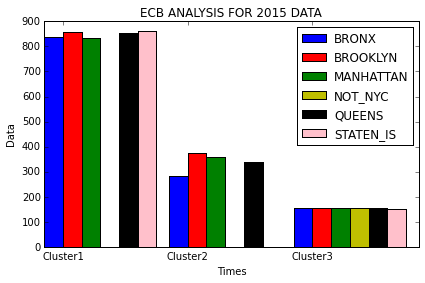

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = 3

BRONX = (time_cluster_matrix[0,0],time_cluster_matrix[0,1],time_cluster_matrix[0,2])

BROOKLYN = (time_cluster_matrix[1,0],time_cluster_matrix[1,1],time_cluster_matrix[1,2])

MANHATTAN = (time_cluster_matrix[2,0],time_cluster_matrix[2,1],time_cluster_matrix[2,2])

NOT_NYC= (time_cluster_matrix[3,0],time_cluster_matrix[3,1],time_cluster_matrix[3,2])

QUEENS = (time_cluster_matrix[4,0],time_cluster_matrix[4,1],time_cluster_matrix[4,2])

STATEN_IS= (time_cluster_matrix[5,0],time_cluster_matrix[5,1],time_cluster_matrix[5,2])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.15

opacity = 1.0
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index,BRONX, bar_width,
                 alpha=opacity,
                 color='b',
                 label='BRONX')

rects2 = plt.bar(index + bar_width, BROOKLYN, bar_width,
                 alpha=opacity,
                 color='r',
                 label='BROOKLYN')

rects3 = plt.bar(index + bar_width + bar_width, MANHATTAN, bar_width,
                 alpha=opacity,
                 color='g',
                 label='MANHATTAN')

rects4 = plt.bar(index + bar_width + bar_width + bar_width,NOT_NYC, bar_width,
                 alpha=opacity,
                 color='y',
                 label='NOT_NYC')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width,QUEENS,bar_width,
                 alpha=opacity,
                 color='black',
                 label='QUEENS')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width,STATEN_IS,bar_width,
                 alpha=opacity,
                 color='pink',
                 label='STATEN_IS')

plt.xlabel('Times')
plt.ylabel('Data')
plt.title('ECB ANALYSIS FOR 2015 DATA')
plt.xticks(index + bar_width, ('Cluster1','Cluster2','Cluster3',))
plt.legend()

plt.tight_layout()
plt.show()

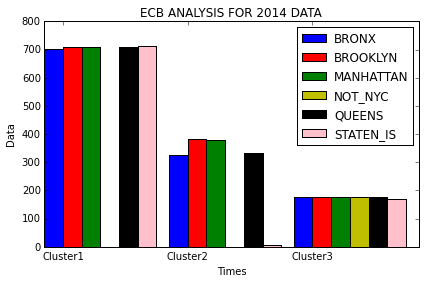

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = 3

BRONX = (time_cluster_matrix1[0,0],time_cluster_matrix1[0,1],time_cluster_matrix1[0,2])

BROOKLYN = (time_cluster_matrix1[1,0],time_cluster_matrix1[1,1],time_cluster_matrix1[1,2])

MANHATTAN = (time_cluster_matrix1[2,0],time_cluster_matrix1[2,1],time_cluster_matrix1[2,2])

NOT_NYC= (time_cluster_matrix1[3,0],time_cluster_matrix1[3,1],time_cluster_matrix1[3,2])

QUEENS = (time_cluster_matrix1[4,0],time_cluster_matrix1[4,1],time_cluster_matrix1[4,2])

STATEN_IS= (time_cluster_matrix1[5,0],time_cluster_matrix1[5,1],time_cluster_matrix1[5,2])

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.15

opacity = 1.0
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index,BRONX, bar_width,
                 alpha=opacity,
                 color='b',
                 label='BRONX')

rects2 = plt.bar(index + bar_width, BROOKLYN, bar_width,
                 alpha=opacity,
                 color='r',
                 label='BROOKLYN')

rects3 = plt.bar(index + bar_width + bar_width, MANHATTAN, bar_width,
                 alpha=opacity,
                 color='g',
                 label='MANHATTAN')

rects4 = plt.bar(index + bar_width + bar_width + bar_width,NOT_NYC, bar_width,
                 alpha=opacity,
                 color='y',
                 label='NOT_NYC')

rects5 = plt.bar(index + bar_width + bar_width + bar_width + bar_width,QUEENS,bar_width,
                 alpha=opacity,
                 color='black',
                 label='QUEENS')

rects6 = plt.bar(index + bar_width + bar_width + bar_width + bar_width + bar_width,STATEN_IS,bar_width,
                 alpha=opacity,
                 color='pink',
                 label='STATEN_IS')

plt.xlabel('Times')
plt.ylabel('Data')
plt.title('ECB ANALYSIS FOR 2014 DATA')
plt.xticks(index + bar_width, ('Cluster1','Cluster2','Cluster3',))
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
BRONX_2014 = sum((time_cluster_matrix1[0,0],time_cluster_matrix1[0,1],time_cluster_matrix1[0,2]))

BROOKLYN_2014 = sum((time_cluster_matrix1[1,0],time_cluster_matrix1[1,1],time_cluster_matrix1[1,2]))

MANHATTAN_2014 = sum((time_cluster_matrix1[2,0],time_cluster_matrix1[2,1],time_cluster_matrix1[2,2]))

NOT_NYC_2014 = sum((time_cluster_matrix1[3,0],time_cluster_matrix1[3,1],time_cluster_matrix1[3,2]))

QUEENS_2014 = sum((time_cluster_matrix1[4,0],time_cluster_matrix1[4,1],time_cluster_matrix1[4,2]))

STATEN_IS_2014 = sum((time_cluster_matrix1[5,0],time_cluster_matrix1[5,1],time_cluster_matrix1[5,2]))
                  
#2015 Data
                
BRONX_2015= sum((time_cluster_matrix[0,0],time_cluster_matrix[0,1],time_cluster_matrix[0,2]))

BROOKLYN_2015= sum((time_cluster_matrix[1,0],time_cluster_matrix[1,1],time_cluster_matrix[1,2]))

MANHATTAN_2015 = sum((time_cluster_matrix[2,0],time_cluster_matrix[2,1],time_cluster_matrix[2,2]))

NOT_NYC_2015 = sum((time_cluster_matrix[3,0],time_cluster_matrix[3,1],time_cluster_matrix[3,2]))

QUEENS_2015 = sum((time_cluster_matrix[4,0],time_cluster_matrix[4,1],time_cluster_matrix[4,2]))

STATEN_IS_2015 = sum((time_cluster_matrix[5,0],time_cluster_matrix[5,1],time_cluster_matrix[5,2]))



In [12]:
DATA_2014 = sum((BRONX_2014,BROOKLYN_2014,MANHATTAN_2014,NOT_NYC_2014,QUEENS_2014,STATEN_IS_2014))

DATA_2015 = sum((BRONX_2015,BROOKLYN_2015,MANHATTAN_2015,NOT_NYC_2015,QUEENS_2015,STATEN_IS_2015))

Violation_Rate = ( DATA_2015 - DATA_2014 ) / DATA_2014

Violation_Rate = (Violation_Rate)*100

print ('Percentage it got increased by =',Violation_Rate,'%')

Percentage it got increased by = 8.61323578317 %


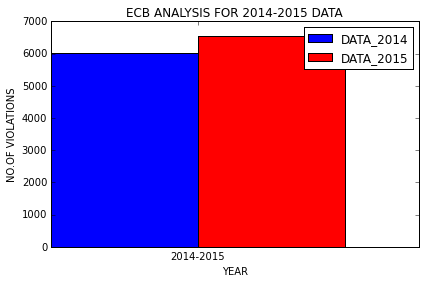

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n_groups = 1

DATA_2014 = sum((BRONX_2014,BROOKLYN_2014,MANHATTAN_2014,NOT_NYC_2014,QUEENS_2014,STATEN_IS_2014))

DATA_2015 = sum((BRONX_2015,BROOKLYN_2015,MANHATTAN_2015,NOT_NYC_2015,QUEENS_2015,STATEN_IS_2015))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.01

opacity = 1.0
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index,DATA_2014, bar_width,
                 alpha=opacity,
                 color='b',
                 label='DATA_2014')

rects2 = plt.bar(index + bar_width, DATA_2015, bar_width,
                 alpha=opacity,
                 color='r',
                 label='DATA_2015')



plt.xlabel('YEAR')
plt.ylabel('NO.OF VIOLATIONS')
plt.title('ECB ANALYSIS FOR 2014-2015 DATA')
plt.xticks(index+bar_width, ('2014-2015','2015'))
plt.legend()

plt.tight_layout()
plt.show()

